<a href="https://colab.research.google.com/github/mdunand2/2024_MLEES/blob/main/Project/Landslide_Italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import rainfall data from Italy

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Downloading the necessary libraries

In [3]:
pip install pandas

In [4]:
import pandas as pd

# Provide access to google drive for direct data retrieval
from google.colab import drive
drive.mount('/content/drive')

# Import files with rainfall events that triggered shallow landslides (SL)
with_SL = pd.read_csv('/content/drive/MyDrive/si_12.csv', sep = ';')
# Import files with rainfall events that didn't trigger shallow landslides (SL)
without_SL = pd.read_csv('/content/drive/MyDrive/no_12_subsamp.csv', sep = ';')

Mounted at /content/drive


Let's see if our two databases have been imported correctly

In [5]:
print("Rainfall events that triggered SL :")
with_SL.head()

Rainfall events that triggered SL :


,Dnl,Cnl,Dl,Cl,bit_lan,ID_raingauge,REN,type,date,year,month,day,hou,MAP,rdY,zone_Rei_Guz,Corine_LIV_2
0,18,38.8,12,17.0,1,4265480137173,227,N_0084,2008-06-09 16:00:00,2008,6,9,1,789.9,68,*,*
1,16,12.6,12,75.6,1,4265480137173,412,N_0185,2013-11-11 22:00:00,2013,11,11,2,789.9,68,*,*
2,38,84.4,12,13.8,1,4272970136917,130,N_5311,2012-07-24 09:00:00,2012,7,24,0,422.0,42,*,*
3,35,43.2,12,0.0,1,4272970136917,147,N_5416,2013-05-12 10:00:00,2013,5,12,1,422.0,42,*,*
4,49,42.8,12,41.8,1,4275720136456,97,N_3296,2009-04-21 21:00:00,2009,4,21,2,487.1,44,*,*


In [6]:
print("Rainfall events that didn't triggered SL :")
without_SL.head()

Rainfall events that didn't triggered SL :


,Dnl,Cnl,Dl,Cl,bit_lan,ID_raingauge,REN,type,date,year,month,day,hou,MAP,rdY,zone_Rei_Guz,Corine_LIV_2
0,68,18.6,12,0.0,0,4423720105164,220,no_frana,2010-01-18 10:00:00,2010,1,18,1,1530.2,94,*,*
1,152,15.6,12,0.0,0,3797270142892,147,no_frana,2006-12-25 00:00:00,2006,12,25,0,683.3,67,*,*
2,3,11.6,12,1.2,0,4581190098661,21,no_frana,2012-07-06 22:00:00,2012,7,6,2,1277.1,85,*,*
3,49,90.0,12,12.8,0,4531530075472,307,no_frana,2010-11-02 07:00:00,2010,11,2,0,1287.4,78,*,*
4,22,34.6,12,5.4,0,4612990123183,7,no_frana,2002-04-17 05:00:00,2002,4,17,0,1263.8,81,*,*


Now that our two databases have been correctly imported, it's important to prepare the data. To start with, we're going to merge these two tables into one.

In [7]:
# Concatenate the two DataFrames
total_SL = pd.concat([with_SL, without_SL], ignore_index=True)

# Display the merged DataFrame
total_SL

,Dnl,Cnl,Dl,Cl,bit_lan,ID_raingauge,REN,type,date,year,month,day,hou,MAP,rdY,zone_Rei_Guz,Corine_LIV_2
0,18,38.8,12,17.0,1,4265480137173,227,N_0084,2008-06-09 16:00:00,2008,6,9,1,789.9,68,*,*
1,16,12.6,12,75.6,1,4265480137173,412,N_0185,2013-11-11 22:00:00,2013,11,11,2,789.9,68,*,*
2,38,84.4,12,13.8,1,4272970136917,130,N_5311,2012-07-24 09:00:00,2012,7,24,0,422.0,42,*,*
3,35,43.2,12,0.0,1,4272970136917,147,N_5416,2013-05-12 10:00:00,2013,5,12,1,422.0,42,*,*
4,49,42.8,12,41.8,1,4275720136456,97,N_3296,2009-04-21 21:00:00,2009,4,21,2,487.1,44,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,71,5.2,12,3.6,0,4452940104894,32,no_frana,2002-12-28 18:00:00,2002,12,28,1,650.2,61,*,*
4584,62,12.0,12,7.8,0,4382040104132,121,no_frana,2006-03-24 17:00:00,2006,3,24,1,968.8,68,*,*
4585,3,3.4,12,2.8,0,4412000118081,109,no_frana,2010-04-13 12:00:00,2010,4,13,1,549.2,52,*,*
4586,14,10.2,12,0.0,0,3825700155604,53,no_frana,2004-02-17 02:00:00,2004,2,17,0,915.6,78,*,*


It is necessary to prepare the data so as to keep only those variables that really interest us for this project.

*   Dnl : Antecedent period of the rainfall
*   Cnl : Cumulated intensity during the antecedent period
*   Dl : Triggering period of the rainfall
*   Cl : Cumulated intensity during the triggering period
*   bit_lan : If the rainfall, triggered a shallow landslide (SL), bit_lan = 1, and if not bit_lan = 0
*   date : Date and time of the beginning of the rainfall (à contrôler)

In [8]:
 # Select the columns that are important for the project
selected_SL = total_SL.iloc[:, [0, 1, 3, 4, 8]]

selected_SL.head()

,Dnl,Cnl,Cl,bit_lan,date
0,18,38.8,17.0,1,2008-06-09 16:00:00
1,16,12.6,75.6,1,2013-11-11 22:00:00
2,38,84.4,13.8,1,2012-07-24 09:00:00
3,35,43.2,0.0,1,2013-05-12 10:00:00
4,49,42.8,41.8,1,2009-04-21 21:00:00


The data will be divided into training, test and validation sets.

In [9]:
from sklearn.model_selection import train_test_split

# Separate the data into two groups: with landslides (bit_lan=1) and without landslides (bit_lan=0)
with_landslide = selected_SL[selected_SL['bit_lan'] == 1]
without_landslide = selected_SL[selected_SL['bit_lan'] == 0]


# 1. Divide each group into training/validation data (80%) and test data (20%)
with_landslide_train_val, with_landslide_test = train_test_split(with_landslide, test_size=0.2, random_state=42)
without_landslide_train_val, without_landslide_test = train_test_split(without_landslide, test_size=0.2, random_state=42)

# 2. Divide the training/validation package (80%) between training (64%) and validation (16%)
with_landslide_train, with_landslide_val = train_test_split(with_landslide_train_val, test_size=0.2, random_state=42)
without_landslide_train, without_landslide_val = train_test_split(without_landslide_train_val, test_size=0.2, random_state=42)

# 3. Combine training, validation and test data for the two classes (with and without landslides)
train_df = pd.concat([with_landslide_train, without_landslide_train], ignore_index=True)
val_df = pd.concat([with_landslide_val, without_landslide_val], ignore_index=True)
test_df = pd.concat([with_landslide_test, without_landslide_test], ignore_index=True)

# Afficher la taille des ensembles pour vérification
print(f"Size training set : {train_df.shape[0]}")
print(f"Size validation set : {val_df.shape[0]}")
print(f"Size test set : {test_df.shape[0]}")


Size training set : 2936
Size validation set : 734
Size test set : 918


It is still necessary to create the matrix X and y, X being the exponential variables, i.e. Dnl, Cnl, Cl, and y the target values, i.e. bit_lan. for training, test and validation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare the explanatory variables and the target variable
# The explanatory columns are Dnl, Cnl, Cl and the target variable is bit_lan

# For the training set
X_train = train_df[['Dnl', 'Cnl', 'Cl']]
y_train = train_df['bit_lan']

# For the validation set
X_val = val_df[['Dnl', 'Cnl', 'Cl']]
y_val = val_df['bit_lan']

# For the test set
X_test = test_df[['Dnl', 'Cnl', 'Cl']]
y_test = test_df['bit_lan']

In [11]:
# 2. Initialiser le modèle Random Forest
# Vous pouvez ajuster le nombre d'arbres avec le paramètre n_estimators et d'autres hyperparamètres si nécessaire
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# 3. Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# 4. Évaluer le modèle

# Prédictions sur l'ensemble de validation
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Précision sur l'ensemble de validation : {val_accuracy:.2f}")

# Prédictions sur l'ensemble de test
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Précision sur l'ensemble de test : {test_accuracy:.2f}")

# Rapport de classification pour l'ensemble de test
print("\nRapport de classification pour l'ensemble de test :")
print(classification_report(y_test, y_test_pred))

# Matrice de confusion pour l'ensemble de test
print("\nMatrice de confusion pour l'ensemble de test :")
print(confusion_matrix(y_test, y_test_pred))

Précision sur l'ensemble de validation : 0.80
Précision sur l'ensemble de test : 0.81

Rapport de classification pour l'ensemble de test :
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       459
           1       0.82      0.80      0.81       459

    accuracy                           0.81       918
   macro avg       0.81      0.81      0.81       918
weighted avg       0.81      0.81      0.81       918


Matrice de confusion pour l'ensemble de test :
[[376  83]
 [ 91 368]]


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Définir les paramètres et leurs valeurs possibles pour la recherche
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],        # Nombre d'arbres
    'max_depth': [None, 10, 20, 30, 40, 50],          # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],                  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],                    # Nombre minimum d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2'],         # Nombre maximum de caractéristiques à considérer pour chaque split
    'bootstrap': [True, False]                        # Méthode de rééchantillonnage
}

# 2. Initialiser le modèle Random Forest
model = RandomForestClassifier(random_state=42)

# 3. Configurer RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,                   # Nombre de combinaisons testées (plus élevé = plus de précision mais plus de temps)
    scoring='accuracy',          # Critère d'évaluation
    cv=5,                        # Validation croisée à 5 plis
    random_state=42,
    n_jobs=-1                    # Utiliser tous les cœurs du processeur
)

# 4. Lancer la recherche aléatoire sur l'ensemble d'entraînement
random_search.fit(X_train, y_train)

# 5. Afficher les meilleurs hyperparamètres trouvés et la précision correspondante
print("Meilleurs hyperparamètres : ", random_search.best_params_)
print("Précision avec les meilleurs paramètres : ", random_search.best_score_)


Meilleurs hyperparamètres :  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Précision avec les meilleurs paramètres :  0.825272050898724


Maintenant que les meilleurs paramètres ont été trouvés, on va réentraîner notre modèle avec ces paramètres.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Créer un nouveau modèle Random Forest avec les meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42)

# 2. Entraîner le modèle final sur l'ensemble d'entraînement
final_model.fit(X_train, y_train)

# 3. Évaluer le modèle sur l'ensemble de validation
y_val_pred = final_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Précision sur l'ensemble de validation avec le modèle final : {val_accuracy:.2f}")

# 4. Évaluer le modèle sur l'ensemble de test
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Précision sur l'ensemble de test avec le modèle final : {test_accuracy:.2f}")

# Afficher le rapport de classification pour des mesures plus détaillées
print("\nRapport de classification pour l'ensemble de test :")
print(classification_report(y_test, y_test_pred))

# Afficher la matrice de confusion pour l'ensemble de test
print("\nMatrice de confusion pour l'ensemble de test :")
print(confusion_matrix(y_test, y_test_pred))

Précision sur l'ensemble de validation avec le modèle final : 0.81
Précision sur l'ensemble de test avec le modèle final : 0.82

Rapport de classification pour l'ensemble de test :
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       459
           1       0.81      0.82      0.82       459

    accuracy                           0.82       918
   macro avg       0.82      0.82      0.82       918
weighted avg       0.82      0.82      0.82       918


Matrice de confusion pour l'ensemble de test :
[[372  87]
 [ 82 377]]


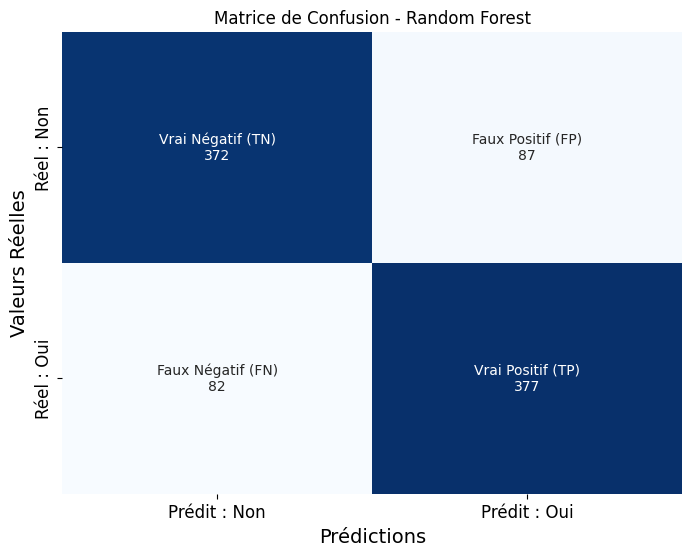

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Définir les étiquettes pour chaque case (Vrai Positif, Faux Positif, etc.)
labels = ['Vrai Négatif (TN)', 'Faux Positif (FP)', 'Faux Négatif (FN)', 'Vrai Positif (TP)']
label_counts = [f"{label}\n{value}" for label, value in zip(labels, conf_matrix.flatten())]
label_counts = np.array(label_counts).reshape(2, 2)

# Tracer la matrice de confusion avec des annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=label_counts, fmt='', cmap='Blues', cbar=False,
            xticklabels=['Prédit : Non', 'Prédit : Oui'],
            yticklabels=['Réel : Non', 'Réel : Oui'])

plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()


In [17]:
# Extraire l'importance des variables
importances = final_model.feature_importances_

# Obtenir les noms des variables (colonnes utilisées pour l'entraînement)
feature_names = X_train.columns  # Remplacer X_train.columns par une liste si les colonnes n'ont pas de nom dans le DataFrame

# Associer chaque nom de variable à son importance
feature_importances = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

  Variable  Importance
2       Cl    0.551568
1      Cnl    0.294656
0      Dnl    0.153776


<ipython-input-18-e6883a0cd219>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=feature_importances, palette='viridis')


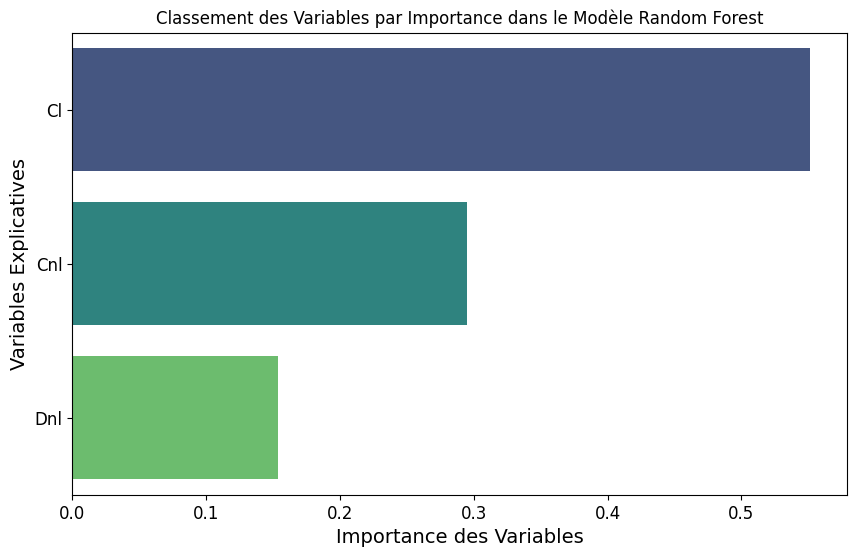

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer un graphique en barres de l'importance des variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=feature_importances, palette='viridis')
plt.title("Classement des Variables par Importance dans le Modèle Random Forest")
plt.xlabel("Importance des Variables")
plt.ylabel("Variables Explicatives")
plt.show()

Aire sous la courbe ROC (AUC) : 0.90


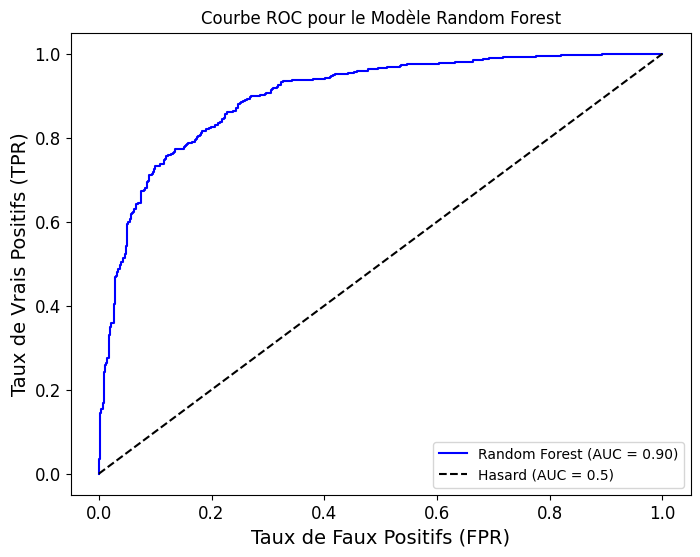

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculer les probabilités pour la classe positive (glissement de terrain)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

# Calculer les valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Calculer l'AUC
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"Aire sous la courbe ROC (AUC) : {auc_score:.2f}")

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Hasard (AUC = 0.5)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC pour le Modèle Random Forest")
plt.legend(loc="lower right")
plt.show()
